In [1]:
#!/usr/bin/env python
# coding: utf-8

# %% Loading Packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error, mean_absolute_error

import sys

import sys
import os
import sys
import platform

if platform.node() in ['msbq']:
    os.chdir('/home/ms/github/fxpred')
    sys.path.append(os.path.join(os.getcwd(), 'Transformer'))
# from utils import data_read_dict, data_read_concat, data_merge
from utils import get_fx_and_metric_data_wo_weekend
from utils_NN_opt_learning_rate import opt_learn_rate_plot

In [2]:
target_column = 'EURUSD BGNE Curncy Bid Close'

In [3]:
df = get_fx_and_metric_data_wo_weekend(pct_change=False)

/home/ms/github/venv/fxpred3/lib/python3.8/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:xlabel='Dates'>

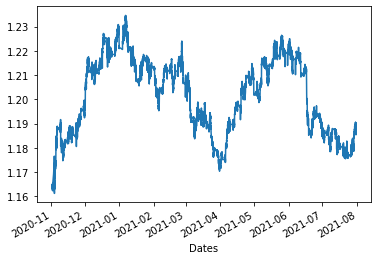

In [4]:
x = df.loc[:, target_column]
x.plot()

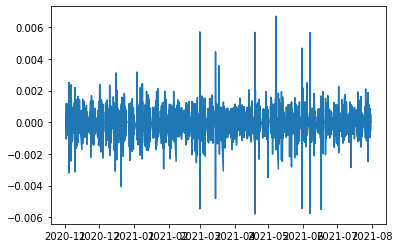

In [5]:
tmp0 = x.iloc[:-1]
tmp1 = x.iloc[1:]
tmp_diff = (tmp1.values - tmp0.values)
plt.plot(tmp1.index, tmp_diff)

In [37]:
h = 1
y_pred = x.iloc[:-h].values
y = x.iloc[h:].values

def mde(y_true, y_pred):
    return 1 - np.equal(np.sign(y_true[1:] - y_true[:-1]), np.sign(y_pred[1:] - y_true[:-1])).mean()

def mde2(y_true, y_pred):
    return 1 - np.equal(y_true[1:] - y_true[:-1] >= 0, y_pred[1:] - y_true[:-1] >= 0).mean()

print(mde(y, y_pred))
print(mde2(y, y_pred))

0.9625301620130989
0.47387107893829716


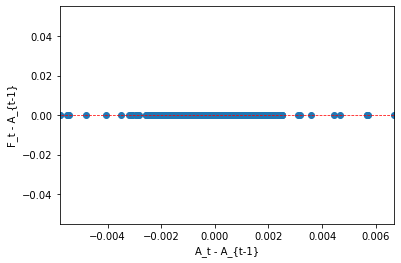

In [38]:
plt.scatter(y[1:] - y[:-1], y_pred[1:] - y[:-1])
plt.xlabel('A_t - A_{t-1}')
plt.ylabel('F_t - A_{t-1}')
plt.xlim([min(y[1:] - y[:-1]), max(y[1:] - y[:-1])])
y_min = min(y_pred[1:] - y[:-1]) * 1.25
y_max = max(y_pred[1:] - y[:-1]) * 1.25
x_min = min(y[1:] - y[:-1]) * 1.25
x_max = max(y[1:] - y[:-1]) * 1.25
plt.vlines(0, y_min, y_max, linestyle='dashed', colors='red', lw=0.75)
plt.hlines(0, x_min, x_max, linestyle='dashed', colors='red', lw=0.75)
plt.show()

In [152]:
# x.resample("1h").sum()
def get_freq(x, freq=10):
    return x.resample(f'{freq}min', convention='end').ffill()

In [170]:
freqs = [60.0 * i for i in [1/6,1/3,1/2,1,2,3,4,6,8,12,24, 48, 72, 168]]

In [154]:
h = 1
mdes0 = {f: mde(get_freq(x, f).iloc[h:].values, get_freq(x, f).iloc[:-h].values) for f in freqs}
mdes1 = {f: mde2(get_freq(x, f).iloc[h:].values, get_freq(x, f).iloc[:-h].values) for f in freqs}

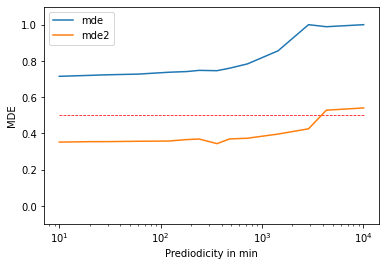

In [172]:
plt.hlines(y=0.5, xmin=min(mdes0.keys()), xmax=max(mdes0.keys()), linestyle='dashed', colors='red', lw=0.75)
plt.plot(mdes0.keys(), mdes0.values(), label='mde')
plt.plot(mdes1.keys(), mdes1.values(), label='mde2')
plt.semilogx()
plt.xlabel('Prediodicity in min')
plt.ylabel('MDE')
plt.ylim([-0.1, 1.1])
plt.legend()
plt.show()